<a href="https://colab.research.google.com/github/K-Kilel/Predicting-the-results-of-a-football/blob/main/Moringa_School_Core_Program_Independent_Project_Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREDICTING THE RESULTS OF A FOOTBALL GAME**

**RESEARCH QUESTION**

I have been tasked to act as the football analyst for the Mchezopesa Limted Company to predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (including the rank in my training).


**METRICS FOR SUCCESS**

To create two models that are reliable and accurate to predict:

*   Model 1: how many goals the home team scores.
*   Model 2:  how many goals the away team scores.


**UNDERSTANDING THE CONTEXT**

Football or soccer has become a sensational game accross the globe with supporters and fans in each and every region of the world. A rise has been noticed in the use of data by organizations and individuals to enhance the game and gain competitive advantage. 
FIFA, football governing body, has ranked countries based on the past results in various global tournaments. We will use the datasets from FIFA to create the models.


**EXPERIMENTAL DESIGN**

*  Perform your EDA

*   Perform any necessary feature engineering 

*  Check of multicollinearity

*   Start building the model

  *  Approach 1: Polynomial approach

      *  Model 1: Predict how many goals the home team scores.
      *   Model 2: Predict how many goals the away team scores.

  *   Approach 2: Logistic approach

      *  Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

*   Cross-validate the model

*   Compute RMSE

*  Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test.

*   Perform appropriate regressions on the data including your justification

*   Challenge your solution by providing insights on how you can make improvements.


**DATA RELEVANCE**

These datasets have been extracted from the FIFA official website. 

The two datasets are:

*   Rank Dataset - contains team rankings from 1993 to 2018.
*   Results Dataset - contains games and the team scores from 1892 to 2019.

Here is the link to the datasets: 

  *  https://drive.google.com/file/d/1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc/view






## **Reading the Data**

In [245]:
# Importing Libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp

from sklearn import linear_model, datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold


In [162]:
# Loading the datasets
df_rank = pd.read_csv('fifa_ranking.csv')
df_results = pd.read_csv('results.csv')

## **Checking the data**

In [163]:
# Determining the number of records

print('The rank dataset has', df_rank.shape[0], 'rows and', df_rank.shape[1], 'columns.')
print('The results dataset has', df_results.shape[0], 'rows and', df_results.shape[1], 'columns.')

The rank dataset has 57793 rows and 16 columns.
The results dataset has 40839 rows and 9 columns.


In [164]:
# Previewing the top records of rank dataset

df_rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [165]:
# Previewing the top records of result dataset

df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [166]:
# Previewing the bottom records of rank dataset

df_rank.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [167]:
# Previewing the bottom records of result dataset

df_results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [168]:
# Checking whether each column has an appropriate datatype
print(df_rank.dtypes)
print(df_results.dtypes)

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object
date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object


## **Tidying the Datasets**

In [169]:
# Identifying missing data

print(df_rank.isnull().sum())
print(df_results.isnull().sum())

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64
date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64


##### Both datasets have no missing data.

In [170]:
# Dropping columns that will not be relevant to the study

df_rank.drop(['country_abrv', 'total_points', 'cur_year_avg', 'previous_points', 'rank_change','cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted','two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg','three_year_ago_weighted', 'confederation'], axis = 1, inplace = True)
print(df_rank.columns)

df_results.drop(['city', 'neutral', 'country'], axis = 1, inplace = True)
print(df_results.columns)

Index(['rank', 'country_full', 'rank_date'], dtype='object')
Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament'],
      dtype='object')


In [171]:
# Renaming columns in datasets
df_rank.rename({'rank': 'home_rank', 'country_full': 'home_team'}, axis = 1, inplace = True)

df_rank.head()

,home_rank,home_team,rank_date
0,1,Germany,1993-08-08
1,2,Italy,1993-08-08
2,3,Switzerland,1993-08-08
3,4,Sweden,1993-08-08
4,5,Argentina,1993-08-08


In [172]:
# Converting date to date time

df_rank['rank_date'] = pd.to_datetime(df_rank['rank_date'])
df_results['date'] = pd.to_datetime(df_results['date'])

# Checking to confirm conversion of the selected columns to datetime
print(df_rank.dtypes)
print(df_results.dtypes)

home_rank             int64
home_team            object
rank_date    datetime64[ns]
dtype: object
date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
dtype: object


## **Feature Engineering**

In [173]:
# Changing the tournament to the three categories

def tournament(value):
  if value == 'Friendly':
    return 'Friendly'
  elif value == 'FIFA World Cup':
    return 'World Cup'
  else:
    return 'Other'

df_results['tournament']= df_results.tournament.apply(lambda v: tournament(v))

In [174]:
# Previewing the unique values in the tournament column to ascertain changes
df_results['tournament'].unique()

array(['Friendly', 'Other', 'World Cup'], dtype=object)

In [175]:
# Adding a status column for the home team and away team

df_results['Status'] = df_results['home_score'] - df_results['away_score']

def Status(goals):
  if goals > 0:
    return 'Win'
  elif goals < 0:
    return 'Loss'
  else:
    return 'Draw'

df_results['Status'] = df_results.Status.apply(lambda goals: Status(goals))

# Previewing the Status column to ascertain changes
df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,Status
0,1872-11-30,Scotland,England,0,0,Friendly,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,Win
2,1874-03-07,Scotland,England,2,1,Friendly,Win
3,1875-03-06,England,Scotland,2,2,Friendly,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Win


In [176]:
# Splitting the date column to year and month

df_results['year'] = pd.DatetimeIndex(df_results['date']).year
df_results['month'] = pd.DatetimeIndex(df_results['date']).month

df_rank['year'] = pd.DatetimeIndex(df_rank['rank_date']).year
df_rank['month'] = pd.DatetimeIndex(df_rank['rank_date']).month


# Dropping the initial dates
df_results.drop(['date'], axis = 1, inplace=True)
df_rank.drop(['rank_date'], axis = 1, inplace=True)

# Previewing the top records 

print(df_results.head(2))
print(df_rank.head(2))

  home_team away_team  home_score  away_score tournament Status  year  month
0  Scotland   England           0           0   Friendly   Draw  1872     11
1   England  Scotland           4           2   Friendly    Win  1873      3
   home_rank home_team  year  month
0          1   Germany  1993      8
1          2     Italy  1993      8


In [177]:
#Merging the datasets to get two two datasets:
# 1. Home_merged dataset
# 2. Away_merged dataset

# Renaming the date column in rank

#df_rank.rename({'rank_date': 'date'}, axis = 1, inplace = True)

# Merging with home team to get home_merged dataset

home_merged = pd.merge(df_results, df_rank, how="left", on = ['home_team', 'year', 'month'])

# Previewing the top records to ascertain changes

home_merged.head()

,home_team,away_team,home_score,away_score,tournament,Status,year,month,home_rank
0,Scotland,England,0,0,Friendly,Draw,1872,11,NaN
1,England,Scotland,4,2,Friendly,Win,1873,3,NaN
2,Scotland,England,2,1,Friendly,Win,1874,3,NaN
3,England,Scotland,2,2,Friendly,Draw,1875,3,NaN
4,Scotland,England,3,0,Friendly,Win,1876,3,NaN


In [178]:
# Merging the two datasets to get away_merged dataset

# Renaming columns
#
df_new = df_rank.rename({'home_team': 'away_team', 'home_rank': 'away_rank' }, axis=1)

# Merging the datasets
merged_df = pd.merge(home_merged, df_new, how= "left", on = ['away_team', 'year', 'month'])
                  
# Previewing the top records to ascertain the changes
merged_df.head()


,home_team,away_team,home_score,away_score,tournament,Status,year,month,home_rank,away_rank
0,Scotland,England,0,0,Friendly,Draw,1872,11,NaN,NaN
1,England,Scotland,4,2,Friendly,Win,1873,3,NaN,NaN
2,Scotland,England,2,1,Friendly,Win,1874,3,NaN,NaN
3,England,Scotland,2,2,Friendly,Draw,1875,3,NaN,NaN
4,Scotland,England,3,0,Friendly,Win,1876,3,NaN,NaN


In [179]:
# Checking the missing values 

merged_df.isnull().sum()

home_team         0
away_team         0
home_score        0
away_score        0
tournament        0
Status            0
year              0
month             0
home_rank     22303
away_rank     22393
dtype: int64

In [180]:
# There are missing values because of difference in data collection from the original datasets

merged_df.dropna(inplace=True)

# Confirming there are no missing values

merged_df.isnull().sum()

home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
Status        0
year          0
month         0
home_rank     0
away_rank     0
dtype: int64

In [181]:
# Checking for duplicates
merged_df.duplicated().sum()

95

In [182]:
# Dropping duplicated values for greater accuracy
merged_df.drop_duplicates(inplace=True)

In [183]:
# Dropping columns not relevant
merged_df1 = merged_df.drop(['home_team', 'away_team'], axis = 1)

In [184]:
# Checking the shape of the cleaned merged dataset
merged_df1.shape

(16862, 8)

In [185]:
# Encoding the categorical columns
le = LabelEncoder()

merged_df1['Status'] = le.fit_transform(merged_df1['Status'])
merged_df1['tournament'] = le.fit_transform(merged_df1['tournament'])

In [186]:
# Previewing our dataset
merged_df1.head()

,home_score,away_score,tournament,Status,year,month,home_rank,away_rank
17910,0,0,1,0,1993,8,19.0,67.0
17911,0,1,1,1,1993,8,70.0,5.0
17912,0,0,1,0,1993,8,22.0,35.0
17913,1,5,1,1,1993,8,94.0,8.0
17914,0,0,1,0,1993,8,58.0,25.0


## **Multicollinearity**

In [187]:
# Picking independent variables only 
ind_df = merged_df1[['home_rank','year', 'month', 'tournament', 'away_score', 'away_rank', 'Status']]

# Dispalying the correlation between indepent variables
correlations = ind_df.corr()

# Using Variance Inflation Factor(VIF) 
pd.DataFrame(np.linalg.inv(correlations.values), index=correlations.index, columns=correlations.columns)

,home_rank,year,month,tournament,away_score,away_rank,Status
home_rank,1.527683,-0.070304,-0.009168,-0.044274,-0.427067,-0.837386,0.253475
year,-0.070304,1.017252,0.001895,0.028877,0.016171,-0.080911,0.030719
month,-0.009168,0.001895,1.015837,-0.120479,-0.016674,-0.019375,-0.006875
tournament,-0.044274,0.028877,-0.120479,1.025035,-0.043180,-0.045504,-0.049779
away_score,-0.427067,0.016171,-0.016674,-0.043180,1.204887,0.384266,0.161977
away_rank,-0.837386,-0.080911,-0.019375,-0.045504,0.384266,1.545979,-0.334138
Status,0.253475,0.030719,-0.006875,-0.049779,0.161977,-0.334138,1.142857


##### The matrix above shows that there are some correlation but not enough to be overly concerned since the VIF is below 5.

## **Building the models**
####  i) Approach One: Polynomial Regression

##### Model 1: Predict how many goals the home team scores

In [197]:
# Select the columns needed for predicting as instructed

md_1 = merged_df1[[ 'home_rank', 'away_rank', 'tournament', 'home_score', 'Status']]

md_1.shape

(16862, 5)

In [198]:
# Selecting the target variable and the feature
X = md_1[['home_rank', 'away_rank', 'tournament', 'Status']].values
y = md_1['home_score'].values

In [199]:
# Split the target and feature
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [204]:
# Fitting Polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly,y)

LinearRegression()

In [221]:

# Predicting using Polynomial Regression
poly_pred = pol_reg.predict(X_poly)

# predicting using Linear Regression
pol_reg = LinearRegression()

Lin = pol_reg.fit(X_poly, y)

y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

In [218]:
# Evaluating our Model

print('RMSE: ', np.sqrt(mean_squared_error(y,poly_pred)))


RMSE:  1.1852695738596515


In [219]:
# Mean of the Actual Scores
np.mean(y)

1.604673229747361

In [222]:
# Residual
residuals = np.subtract(y_pred, y_test)

# Describing residual
pd.DataFrame(residuals).describe()

residuals.mean()

0.023916588032989048

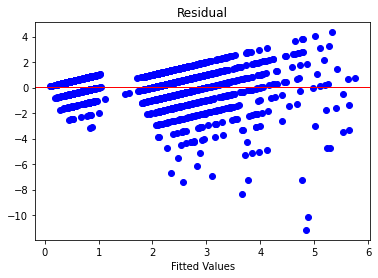

In [223]:
# Visualizing
plt.scatter(y_pred, residuals, color='blue') 
plt.title('Residual')
plt.xlabel('Fitted Values')
plt.axhline(y=residuals.mean(), color= 'red', linewidth=1)
plt.show()

##### **Performing Heteroskedasticity Test**

In [226]:
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous!')

0.19866303009820854
The variances are homogeneous!


Model 2: Predicting how many goals the away team scores

In [229]:
# Selecting the target variable and the feature
X = merged_df1[['home_rank', 'away_rank', 'tournament', 'Status']].values
y = merged_df1['away_score'].values

In [230]:
# Split the target and feature
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [231]:
# Fitting Polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly,y)

LinearRegression()

In [232]:
# Evaluating our Model

print('RMSE: ', np.sqrt(mean_squared_error(y,poly_pred)))


RMSE:  2.106934875420575


In [233]:
# Mean of the Actual Scores
np.mean(y)

1.0696240066421538

In [234]:
# Residual
residuals = np.subtract(y_pred, y_test)

# Describing residual
pd.DataFrame(residuals).describe()

residuals.mean()

0.5394813671613614

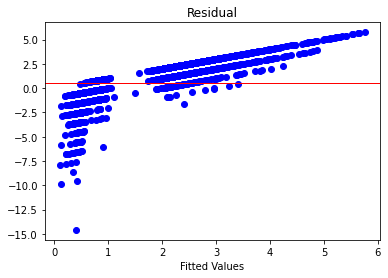

In [235]:
# Visualizing
plt.scatter(y_pred, residuals, color='blue') 
plt.title('Residual')
plt.xlabel('Fitted Values')
plt.axhline(y=residuals.mean(), color= 'red', linewidth=1)
plt.show()

##### **Performing Heteroskedasticity Test**

In [236]:
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous!')

2.592520191152872e-274
The variances are homogeneous!


## **Logistic Regression**

In [238]:
# Selecting the target variable and the feature
X = merged_df1[['home_rank', 'away_rank', 'tournament', 'home_score', 'away_score']].values
y = merged_df1['Status'].values

In [239]:
# Split the target and feature
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [240]:
#Performing feature scaling:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Model Selection:
model = LogisticRegression()

#Fitting the model:
model.fit(X_train,y_train)

LogisticRegression()

In [241]:
#Predicting the value:
predictions = model.predict(X_test)

#Checking the accuracy:
print("Accuracy:",model.score(X_test, y_test )* 100)

Accuracy: 100.0


In [242]:
#Checking precision:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       793
           1       1.00      1.00      1.00       942
           2       1.00      1.00      1.00      1638

    accuracy                           1.00      3373
   macro avg       1.00      1.00      1.00      3373
weighted avg       1.00      1.00      1.00      3373



In [243]:
#Confusion matrix:
predictions = model.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,predictions)
confusion_matrix

array([[ 793,    0,    0],
       [   0,  942,    0],
       [   0,    0, 1638]])

## **Cross Validation**

In [252]:
X = merged_df1[['home_rank', 'away_rank', 'tournament', 'home_score', 'away_score']].values
y = merged_df1['Status'].values


folds = RepeatedKFold(n_splits=5, n_repeats=2)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 0 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining Model ' +str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  LogReg = LinearRegression()  
  LogReg.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = LogReg.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  
  print('Model ' + str(count) + ' Root Mean Squared Error', rmse_value )
  count = count + 1

print('\n')
np.mean(RMSES)

we are using 10 folds

Training Model 0
Model 0 Root Mean Squared Error 0.6824449426323143

Training Model 1
Model 1 Root Mean Squared Error 0.6711932068164317

Training Model 2
Model 2 Root Mean Squared Error 0.6827276053555683

Training Model 3
Model 3 Root Mean Squared Error 0.6974087169365425

Training Model 4
Model 4 Root Mean Squared Error 0.6827656157555181

Training Model 5
Model 5 Root Mean Squared Error 0.6947899730888161

Training Model 6
Model 6 Root Mean Squared Error 0.683082171145309

Training Model 7
Model 7 Root Mean Squared Error 0.6787001346842683

Training Model 8
Model 8 Root Mean Squared Error 0.6743945777620493

Training Model 9
Model 9 Root Mean Squared Error 0.6842081136992255




0.6831715057876042